In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
a_ce_dw = pd.read_csv('./magazine/final/a_ce_dw.csv', sep = '|', encoding = 'utf-8')
b_ce_dw = pd.read_csv('./magazine/final/b_ce_dw.csv', sep = '|', encoding = 'utf-8')
c_ce_dw = pd.read_csv('./magazine/final/c_ce_dw.csv', sep = '|', encoding = 'utf-8')
e_ce_dw = pd.read_csv('./magazine/final/e_ce_dw.csv', sep = '|', encoding = 'utf-8')
fb_ce_dw = pd.read_csv('./magazine/final/fb_ce_dw.csv', sep = '|', encoding = 'utf-8')
fn_ce_dw = pd.read_csv('./magazine/final/fn_ce_dw.csv', sep = '|', encoding = 'utf-8')
m_ce_dw = pd.read_csv('./magazine/final/m_ce_dw.csv', sep = '|', encoding = 'utf-8')
v_ce_dw = pd.read_csv('./magazine/final/v_ce_dw.csv', sep = '|', encoding = 'utf-8')
w_ce_dw = pd.read_csv('./magazine/final/w_ce_dw.csv', sep = '|', encoding = 'utf-8')

In [4]:
ce_dw = pd.concat([a_ce_dw, b_ce_dw, c_ce_dw, e_ce_dw, fb_ce_dw, fn_ce_dw, m_ce_dw, v_ce_dw, w_ce_dw])

In [5]:
ce_dw.reset_index(drop=True, inplace = True)

In [6]:
len(ce_dw)

764

# 전처리

### 기호 삭제

In [7]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '')

## 브랜드 및 디자이너 이름 대체

### 에디 슬리먼, 에디 슬리만 -> 'HEDI-SLIMANE'으로 변경
에디슬리먼, 에디슬리만, 에디 슬리먼, 에디 슬리만

In [120]:
for word in ce_dw['word_celine']:
    if 'HEDI-SLIMANEe' in word:
        print(word)
        print('-'*50)

In [121]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('에디슬리먼', '에디-슬리먼').str.replace('에디 슬리먼', '에디-슬리먼').str.replace('에디슬리만', '에디-슬리먼').str.replace('에디 슬리만', '에디-슬리먼')

In [122]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('에디-슬리먼', 'HEDI-SLIMANE')

In [123]:
'Hedi Slimane'.upper()

'HEDI SLIMANE'

In [124]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Hedi Sliman', 'HEDI-SLIMANE')

In [125]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('HediSlimane', 'HEDI-SLIMANE')

In [126]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('HEDI-SLIMANEe', 'HEDI-SLIMANE')

### 셀린, 셀린느, Celine, celine -> CELINE

In [127]:
for word in ce_dw['word_celine']:
    if 'Celine' in word:
        print(word)
        print('-'*50)

골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(Sandro). 데님 팬츠는 가격미정, 리바이스(Levi’s). 그레이 컬러 니트 톱은 13만2천원, 르누이(Le Nuee). 라이딩 부츠는 2백26만원, 발렌티노 가라바니. 줄무늬 포인트 비니는 8만5천원, 프레드 페리(Fred Perry). 로고 패턴 백은 가격미정, 셀린느., 벨벳 소재의 후드 코트, 레이스 아플리케 디테일 톱, 자카드 소재 스커트, 원석 네크리스는 모두 가격미정, 셀린느(Celine). 반무테 안경은 33만원, 젠틀몬스터(Gentle Monster). 앵클 부츠는 가격미정, 폴로 랄프 로렌(Polo Ralph Lauren).
--------------------------------------------------
  빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, 셀린느(Celine).
--------------------------------------------------
재킷, 셔츠, 슈즈는 셀린느(Celine), 블랙 스커트는 렉토, 이어링은 스타일리스트 소장품.
--------------------------------------------------
재킷, 셔츠, 네크리스는 모두 셀린느(Celine), 팬츠는 다잉브리드, 슈즈는 던힐.
--------------------------------------------------
격자무늬 트렌치코트는 4백26만5천원, 와이드 팬츠는 가격미정, 지방시. 밤색 터틀넥은 가격미정, 르917. 안경은 52만원, 셀린느 바이 베디베로(Celine by Vedi Vero).
--------------------------------------------------
  컬러블록이 조화로운 부츠는 가격미정, 샤넬(Chanel). 와인색 니하이 부츠는 가격미정, 셀린느(Celine). 구조적인 형태의 굽이 돋보이는 베이지색 부츠는 3백만원대, 에르메스(Hermes).
-----------------------------

In [128]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('celine', 'CELINE').str.replace('Celine', 'CELINE').str.replace('셀린', 'CELINE').str.replace('셀린느', 'CELINE')

In [129]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('CELINE느', 'CELINE')

### 피비 파일로, 피비 필로 -> PHOEBE-PHILO

In [130]:
for word in ce_dw['word_celine']:
    if 'Phoebe Philo' in word:
        print(word)
        print('-'*50)

Stella mccartney + Phoebe Philo, 1999 뉴욕 끌로에 부티크 오프닝 행사에 나타난 앳된 얼굴의 아가씨들은 누굴까. 당시 끌로에를 이끌던 스텔라 매카트니, 그리고 그녀의 어시스턴트 피비 파일로. 끌로에를 맡게 된 25세의 스텔라를 사람들은 의심했지만, 그녀는 보란 듯 하우스에 새바람을 일으켰으며, 비건 패션을 알리고 유방암에 대한 경각심을 높이는 한편, 가정 폭력에 반대하는 캠페인을 벌였다. ‘패션계의 신데렐라’ 스텔라의 그늘에 가려져 있던 피비는 2001년, 끌로에의 수장이 된 후 비로소 날개를 펼쳤다. ‘잇’ 백의 시대를 열고 4배 이상의 매출을 달성하는 등 성공을 거머쥔 뒤 그녀는 돌연 패션계를 떠났고, 3년 뒤 CELINE으로 돌아왔다. 이후 10년 동안 피비의 CELINE은 그야말로 승승장구. 두 여성의 공통점은 뭘까. 과시하는 패션이 아닌, 여성을 진정 아름답게 만드는 섬세한 옷을 디자인한다는 것. 그리하여 동시대 여성들의 전폭적인 지지를 받는다는 것.
--------------------------------------------------
오늘날 패션업계에서 가장 존경받는 디자이너 중 한 명인 피비 필로(Phoebe Philo)는 유능한 현대 여성상을 대변하는 CELINE 미학으로 전세계 여성들의 사랑을 받아왔다., 지난 2008년 LVMH 그룹 산하의 CELINE 크리에이티브 디렉터로 합류한 피비 필로는 모더니즘과 미니멀리즘의 황금비율로 올드했던 CELINE를 젊게 변화시키며 전세계 여성들이 가장 입고 싶은 워너비 브랜드 1위로 명성을 재건하며 10년 동안 유례없는 황금기를 누렸다., 현대 여성들이 꿈꾸는 여성상에 가장 근접한 나를 표현할 수 있는 옷, 추상적인 옷보다 현실적인 옷을 추구하는 디자인 철학과 메시지는 피스 하나 하나에 고스란히 녹아 여성들의 마음을 사로잡았으며 피비 필로가 쌓아올린, 유능한 현대 여성상을 대변하는 디자인 미학은 CELINE와 동의어가 되었다.
--------------------------

In [131]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비 파일로', '피비-파일로').str.replace('피비 필로', '피비-파일로')

In [132]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비필로', '피비-파일로')

In [133]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비', '피비-파일로')

In [134]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비-파일로-파일로', '피비-파일로')

In [135]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비-파일로' ,'Phoebe-Philo')

In [136]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Phoebe-Philo' ,'PHOEBE-PHILO')

In [137]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Phoebe Philo' ,'PHOEBE-PHILO')

In [138]:
'Phoebe-Philo'.upper()

'PHOEBE-PHILO'

### 오뜨 -> 오트
오뜨 -> 오트  
꾸띄르 -> 꾸뛰르   
쿠띄르 -> 쿠뛰르  
쿠틔르 -> 쿠튀르  

In [139]:
for word in ce_dw['word_celine']:
    if '쿠튀르' in word:
        print(word)
        print('-'*50)

 남이 아닌 나를 위해,  감추지 말고 자신을 드러내라. 나를 아끼고 사랑하며 진정한 아름다움을 찾는 자기 중심주의 트렌드, 나나랜드.,  BYBAZAAR2019.05.16,  NANA-LAND,,  BEING MYSELF,  지난 2월, 밀라노 패션위크 취재 중 찾은 MM6의 2019 F/W 프레젠테이션 현장. 브랜드의 상징인 화이트 컬러 패브릭으로 천장부터 바닥까지 한 치의 틈도 없이 도배되어 있었다. 그 위에 수줍게 웃으면서 서 있는 모델들 역시 하얀색 옷과 슈즈, 액세서리로 치장하고 있었음은 물론이다. 그러나 특히 인상적이었던 이유는 그들이 전부 백발의 노인이었기 때문. 백인부터 아시안, 흑인까지 인종 또한 다양했다. 주름진 얼굴과 은빛 머리 그리고 살짝 나온 배마저도 정겹게 느껴졌다. 세월의 흔적이 묻어나는 자연스러운 아름다움은 왠지 모르게 평온하고도 따스한 기운을 주고 있었다. 어떤 위대한 미모도 나이를 먹고 나면 더 이상 유지될 수 없지 않나. 외모야말로 아주 순간적인 삶의 복장일 뿐이니 말이다. 유럽과 미국 등지에서 몇 해 전 시작되어 최근 열풍을 일으키고 있는 자기 몸 긍정주의(Body Positive) 운동은 몸무게나 체형에 상관없이 있는 그대로의 자신의 몸 자체를 사랑하는 것. 피부색이 남과 다르거나, 살이 좀 쪘거나, 나이가 들었거나, 키가 작거나, 장애가 있더라도 부끄러워하지 말고 자신을 당당하게 드러내라는 메시지를 전한다. 이것은 스스로 자존감을 찾고, 궁극의 행복을 자기 안에서 찾는 삶의 방식으로 이어지고 있다. 무엇보다 ‘나’ 자신이 가장 중요하고 나만의 기준으로 세상을 살아가는 것을 말하는 ‘나나랜드’. 트렌드 연구자이자 서울대 교수 김난도가 2019년 10대 소비 트렌드로 꼽기도 했다. 나를 아끼고 사랑함으로써 아름다움의 관습과 편견에서 벗어나 있는 그대로 자신의 모습을 인정하고, 타인의 다양성도 존중하는 현상이다. 이기주의에 함몰되지 않고 긍정적이고 지속적으로 ‘나다움’을 찾아가는 이 나나랜더들이 패션계에게도 침투하기 시작했다

In [140]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오뜨' ,'오트')

In [141]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트꾸띄르' ,'오트-꾸뛰르')

In [142]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 꾸띄르' ,'오트-꾸뛰르')

In [143]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 꾸뛰르' ,'오트-꾸뛰르')

In [144]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 쿠튀르' ,'오트-꾸뛰르')

In [145]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트쿠튀르' ,'오트-꾸뛰르')

In [146]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트쿠튀르' ,'오트-꾸뛰르')

In [147]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트-꾸뛰르' ,'HAUTE-COUTURE')

In [148]:
'Haute-Couture'.upper()

'HAUTE-COUTURE'

### 입생로랑
- 생로랑

In [221]:
for word in ce_dw['word_celine']:
    if '생 로랑' in word:
        print(word)
        print('-'*50)

나는 쉬지 않고 다이어트를 한다. 평생을 장거리 수영선수 같은 몸을 가지고 싶었으나, 시시때때로 불어나는 몸은 오래전부터 이미 예약된 신의 계획 같기만 하다. 인생은 불공평하다. 신진대사율도 운명처럼 불공평하다. 성별, 유전자, 호르몬, 염색체, 인종, 나이에 따라 칼로리 소비량은 어김없이 다른데, 나는 근육을 최고의 컨디션에 맞춰 자유자재로 사용하는 법을 교육받은 국가대표 운동선수도 아닌데. 미남의 기준은 저마다 다르겠지만 내가 겪은 패션계는 마른 사람을 미남미녀로 치는 그런 곳이다. 있는 그대로의 자기 자신을 사랑하는 일에 힘을 싣기는 한다. 나 역시 그 가치를 동의하고 지지한다. 하지만 그건 그거고 저건 저거다. HEDI-SLIMANE이 CELINE에 안착하자마자 착수한 건 로고를 날렵하게 바꾸는 일과 입는 사람도 보는 사람도 숨통 트이게 해주던 풍요롭고 세련된 CELINE 스타일을 버리고, 그의 트레이드마크라 할 수 있는 몸에 꽉 맞는 데님을 내놓은 일이다. 안토니 바카렐로가 이끄는 생 로랑은 여전히 쫄쫄이 룩의 최전선에 있으며, 스트리트 무드의 열풍으로 각종 난감한 오버 사이즈를 양산하던 발렌시아가조차 스멀스멀, 감자 껍질이라도 벗겨내는 것처럼 몸의 라인을 드러내고 있다. 나는 여전히 키 크고, 엉덩이 작고, 날카롭게 크롭트된 생 로랑과 CELINE를 입고 싶다. 김밥 한 줄 다 먹어치우는 일에도 행여나 군살이 쌓이지 않을지 노심초사하며 다이어트에 매진하는 이유다. 거울 앞에 섰을 때의 자기만족을 목표로 한 꽤 주체적이고 능동적인 다이어트라 할 수 있다.
--------------------------------------------------
보타이, 오버올 슈트, 버뮤다 쇼츠 등 이번 시즌 데님에도 여지없이 레트로 무드는 존재한다. 여기에 더욱 레트로 스타일을 강조하고 싶다면? 생 로랑이나 CELINE의 컬렉션을 살펴보면 도움이 될 것. 스카프를 활용한 헤어 장식이나 백 장식 등의 간단하지만 요긴한 팁을 얻을 수 있다., 레드 컬러 라피아 모자는 

### ce_dw 파일 저장 -> ce_dwr (drop, word-extracting, replace-word)

In [149]:
ce_dw.to_csv('./magazine/final/ce_dwr.csv', sep='|', encoding = 'utf-8', index = False)

In [150]:
ce_dwr = pd.read_csv('./magazine/final/ce_dwr.csv', sep='|', encoding = 'utf-8')

In [151]:
ce_dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   magazine     823 non-null    object
 1   brand        823 non-null    object
 2   category     823 non-null    object
 3   title        823 non-null    object
 4   link         823 non-null    object
 5   date         823 non-null    object
 6   contents     823 non-null    object
 7   title_brand  823 non-null    int64 
 8   check        823 non-null    int64 
 9   why          120 non-null    object
 10  word_celine  823 non-null    object
dtypes: int64(2), object(9)
memory usage: 70.9+ KB


In [152]:
ce_dwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   magazine     823 non-null    object
 1   brand        823 non-null    object
 2   category     823 non-null    object
 3   title        823 non-null    object
 4   link         823 non-null    object
 5   date         823 non-null    object
 6   contents     823 non-null    object
 7   title_brand  823 non-null    int64 
 8   check        823 non-null    int64 
 9   why          120 non-null    object
 10  word_celine  764 non-null    object
dtypes: int64(2), object(9)
memory usage: 70.9+ KB


## list 생성 후 append

In [153]:
contents_list = []

In [154]:
len(ce_dwr)

823

In [155]:
# ce_dw['word_celine']

In [156]:
magazine_list = []
article_list = []
for word in ce_dw['word_celine']:
    article_list.append(word)

In [157]:
len(article_list)

823

In [158]:
article_list[120]

' Long & Lean Skirt n군더더기 없이 심플한 실루엣의 롱스커트 트렌드가 돌아왔다. CELINE, 프라다, 질샌더, 끌로에 등 런웨이에서 이미 예고된 롱앤린 트렌드는 스트리트에서도 점차 인기를 더해가고 있다. 우아하고 로맨틱한 한겨울 룩을 연출하고 싶다면 톤온톤의 니트 상의와 롱코트를, 경쾌한 겨울 룩을 원한다면 패턴이 가미된 스웨터와 짧은 패딩을 더해볼 것.,  Flare Pants n플레어 팬츠는 한층 더 드라마틱해졌다. 허리부터 허벅지까지는 쫙 붙었다가 무릎 아래부터는 더 과감하게 통이 넓어졌기 때문! CELINE 런웨이에서 선보인 것처럼 1970년대 무드로 보 블라우스와 코트를 더해도 좋고, 지방시나 구찌처럼 각 잡힌 재킷과 함께 카리스마 있게 연출해도 좋다. 키가 작은 편이라 해도 넓은 밑단 아래로 굽 높은 슈즈를 숨길 수 있으니 이 얼마나 고마운 플레어 팬츠인가.'

### 기호 삭제

In [159]:
# import re

# for article in article_list:
#     article_list2 = re.sub('[^\w\s]', '', article)

# # article_list[100].replace(' \', '')

## Hannanum


In [160]:
from konlpy.tag import Hannanum

In [225]:
hannanum = Hannanum()
hannanum = Hannanum(userdic='C:/Users/wnsgo/anaconda3/Lib/site-packages/konlpy/java/data/kE/dic_user.txt')

TypeError: __init__() got an unexpected keyword argument 'userdic'

### 각 문장별로 형태소 구분하기

In [162]:
sentences_tag = []

for sentence in article_list:
    morph = hannanum.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


823


In [163]:
sentences_tag[110]

[('요즘', 'M'),
 ('가장', 'M'),
 ('핫한', 'N'),
 ('인플루언서,', 'N'),
 ('알레일리', 'N'),
 ('메', 'N'),
 ('이', 'J'),
 (',', 'S'),
 ('인플루언서', 'N'),
 ('이', 'J'),
 ('자', 'E'),
 ('스타일리스트', 'N'),
 (',', 'S'),
 ('모델', 'N'),
 ('로', 'J'),
 ('활동', 'N'),
 ('하', 'X'),
 ('는', 'E'),
 ('알레일리', 'N'),
 ('메', 'N'),
 ('이', 'J'),
 ('.', 'S'),
 ('스트리트', 'N'),
 ('와', 'J'),
 ('하이패션', 'N'),
 ('을', 'J'),
 ('넘나들', 'P'),
 ('는', 'E'),
 ('그녀', 'N'),
 ('의', 'J'),
 ('쿨한', 'N'),
 ('취향', 'N'),
 ('을', 'J'),
 ('공개', 'N'),
 ('하', 'X'),
 ('ㄴ다', 'E'),
 ('.', 'S'),
 (',', 'S'),
 ('BYBAZAAR2018.', 'N'),
 ('12.', 'N'),
 ('09', 'N'),
 (',', 'S'),
 ('나', 'N'),
 ('의', 'J'),
 ('스타일', 'N'),
 ('을', 'J'),
 ('정의', 'N'),
 ('하', 'X'),
 ('는', 'E'),
 ('세', 'N'),
 ('가지', 'N'),
 ('?', 'S'),
 (',', 'S'),
 ('스트리트,', 'N'),
 ('아방가르드', 'N'),
 ('그리고', 'M'),
 ('하이패션', 'N'),
 ('.', 'S'),
 (',', 'S'),
 ('가장', 'M'),
 ('선호', 'N'),
 ('하', 'X'),
 ('는', 'E'),
 ('패션', 'N'),
 ('아이템', 'N'),
 ('?', 'S'),
 (',', 'S'),
 ('유니크한', 'N'),
 ('선글라스', 'N'),
 ('.', 'S'),
 (',', 'S

## 한나눔 태그 집합
기호 `S`  
외국어 `F`  
체언 `N`  
용언 `P`
> 동사 `PV`
형용사 `PA`
보조용언 `PX`

수식언 `M`  
>관형사 `MM`
부사 `MA`

...

In [164]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [223]:
buildDictionary(ext_dic = c('sejong', 'woorimalsam'),user_dic = data.frame(term="전작권", tag='ncn'), category_dic_nms=c('political'))

NameError: name 'buildDictionary' is not defined

In [214]:
pd.read_csv('C:/Users/wnsgo/anaconda3/Lib/site-packages/konlpy/java/data/kE/dic_user.txt', header = None, sep = '\t')

,0,1
0,개밥,ncn
1,관형격,ncn
2,교착어,ncn
3,그분들,npp
4,극진,ncps
5,당신들,npp
6,동량재,ncn
7,서충원,ncn
8,우체통,ncn
9,의미,ncpa


### stop_words 추가

In [165]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [173]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [174]:
sw_df.columns = ['stopword']

In [191]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [192]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [183]:
stop_words[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [196]:
add_0 = ['있', '위하', '가격미정', '미정', '가격', '지나', '선보이', '이번', '특히', '통하', '역시', '때문', '않', '알리', '주목', '대하', '한편', '사실', '당시', '그것', '지금', '사람' ]
for w in add_0:
    stop_words.append(w)

In [198]:
add_1 = ['위하', '선보이', '가격', '가격 미정', '미정', '지금', 'BY', 'N', '있', '없', '지나', '만들', '말하', '입', '보', '되','선보이', '같', '대하', '등장']
for w in add_1:
    stop_words.append(w)

In [199]:
stop_words[0]

'아'

In [200]:
len(stop_words)

717

### 1. 명사(N), 용언(P), 수식언(M)인 품사만 선별해 리스트에 담기

In [215]:
NPMF_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['N','P','M','F']:
            if word not in stop_words:
                NPMF_list.append(word)

In [216]:
len(NPMF_list)

78241

In [217]:
NPMF_list[:10]

['골드', '잠그', '장식', '포인트', '주', '케이프', '체크', '코트', '1백9만원', '산드로(Sandro)']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [218]:
word_list = Counter(NPMF_list)
print(word_list.most_common(100))

[('CELINE', 1645), ('지', 664), ('수', 578), ('SLIMANE', 510), ('HEDI', 504), ('컬렉션', 470), ('브랜드', 455), ('룩', 405), ('패션', 376), ('주', 362), ('말', 362), ('시즌', 339), ('컬러', 269), ('PHILO', 269), ('PHOEBE', 265), ('백', 257), ('디자이너', 255), ('내', 252), ('보이', 248), ('새롭', 247), ('드레스', 247), ('쇼', 234), ('가장', 225), ('스타일', 215), ('디자인', 214), ('디렉터', 213), ('재킷', 207), ('장식', 205), ('받', 203), ('코트', 191), ('옷', 187), ('여성', 187), ('팬츠', 185), ('아이템', 177), ('그녀', 173), ('더', 171), ('좋', 170), ('생', 170), ('파리', 170), ('싶', 169), ('남성복', 168), ('크', 167), ('느끼', 164), ('매치', 161), ('소재', 153), ('거', 151), ('많', 150), ('S', 150), ('크리에이티브', 144), ('첫', 141), ('바', 138), ('더하', 137), ('시작', 136), ('두', 134), ('로랑', 132), ('전', 130), ('로고', 129), ('중', 129), ('LVMH', 127), ('대', 124), ('실루엣', 123), ('가죽', 119), ('듯', 117), ('모델', 117), ('셔츠', 114), ('리', 113), ('트렌드', 110), ('영국', 110), ('버버리', 108), ('속', 108), ('한', 107), ('블랙', 106), ('2019', 106), ('런웨이', 106), ('모든', 103), ('찾', 102),

In [65]:
# 한 글자인 단어는 제외

for i, v in enumerate(NPM_list):
    if len(v)<2:
        NPM_list.pop(i)

In [66]:
count = Counter(NPM_list)

In [67]:
word_list = count.most_common(200)
# for v in word_list:
#     print(v)

### 2. 명사만 선별해 리스트에 담기

In [68]:
noun= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['N', 'F']:
                noun.append(word)

In [69]:
for i, v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)

In [70]:
counts = Counter(noun)

### 3. 명사만 선별해 아티클 별로 리스트에 담기

In [71]:
noun_article= []
for sentence1 in sentences_tag:
    art_noun = []
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['N', 'F']:
                art_noun.append(word)
    noun_article.append(art_noun)

print(len(noun_article))

823


In [72]:
len(article_list)

823

In [73]:
noun_df = pd.DataFrame({
    'article':article_list,
    'noun':noun_article
})

In [74]:
w_list = noun_df['noun']

In [75]:
for i in range(len(w_list)):
    for idx, v in enumerate(w_list[i]):
        if len(v)<2:
            w_list[i].pop(idx)

In [76]:
w_list[0]

['골드',
 '장식',
 '포인트',
 '케이프',
 '체크',
 '코트',
 '1백9만원',
 '산드로(Sandro)',
 '데님',
 '팬츠',
 '가격미정',
 '리바이스(Levi’s)',
 '그레이',
 '컬러',
 '니트',
 '13만2천원',
 '르누이(Le',
 'Nuee',
 '라이딩',
 '부츠',
 '2백26만원',
 '발렌티노',
 '가라바',
 '줄무늬',
 '포인트',
 '8만5천원',
 '프레드',
 '페리(Fred',
 'Perry',
 '로고',
 '패턴',
 '가격미정',
 'CELINE',
 '벨벳',
 '소재',
 '후드',
 '코트',
 '레이스',
 '아플리케',
 '디테일',
 '자카드',
 '소재',
 '스커트',
 '원석',
 '네크리스',
 '가격미정',
 'CELINE',
 'CELINE',
 '반무테',
 '안경',
 '33만원',
 '젠틀몬스터(Gentle',
 'Monster',
 '앵클',
 '부츠',
 '가격미정',
 '랄프',
 '로렌(Polo',
 'Ralph',
 'Lauren']

In [77]:
noun_df.to_csv('noun_celine_Hannanum.csv', sep = '|', index = False, encoding = 'utf-8')

In [78]:
noun_df

,article,noun
0,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(Sandro...","[골드, 장식, 포인트, 케이프, 체크, 코트, 1백9만원, 산드로(Sandro),..."
1,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","[빈티지한, 주름, 워싱, 특징, 데님, 팬츠, 가격미정, CELINE, CELINE]"
2,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"[1970년대, 에스닉한, 분위기, CELINE, 방패, 모양, 숄더백]"
3,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","[재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토,, 이어링..."
4,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","[재킷, 셔츠, 네크리스, CELINE, CELINE, 팬츠, 다잉브리드,, 슈즈,..."
...,...,...
818,마야 셀리아 샐리(Maya Celia Sally)n2017 S/S CELINE의 쇼...,"[셀리, 샐리(Maya, Celia, Sally)n2017, S, CELINE, 쇼..."
819,"코리아 파워, 록(Rokh)n지난해 S/S에 파리에서 데뷔한 32세 한국 디자이너 ...","[코리, 파워, 록(Rokh)n지난해, S, 파리, 데뷔, 32세, 한국, 디자이너..."
820,패션 에디터 김신n가을이 다가오니 괜스레 감상적이 된다. 정제된 보헤미안 감성과 함...,"[패션, 에디터, 김신n가을, 괜스레, 감상적, 정제, 보헤미안, 감성, 이국적, ..."
821,,[]


### 명사빈도 카운트

In [80]:
noun_list = counts.most_common(200)
for v in noun_list:
    print(v)

('CELINE', 1645)
('SLIMANE', 509)
('HEDI', 504)
('컬렉션', 470)
('브랜드', 455)
('패션', 376)
('시즌', 339)
('컬러', 269)
('PHILO', 269)
('PHOEBE', 265)
('디자이너', 254)
('드레스', 247)
('스타일', 215)
('디자인', 214)
('디렉터', 213)
('재킷', 207)
('장식', 205)
('코트', 191)
('여성', 187)
('팬츠', 185)
('아이템', 177)
('그녀', 173)
('파리', 170)
('남성복', 168)
('등장', 167)
('매치', 157)
('소재', 153)
('크리에이티브', 144)
('시작', 136)
('로랑', 132)
('로고', 129)
('LVMH', 127)
('실루엣', 123)
('가격미정', 120)
('가죽', 119)
('모델', 117)
('때문', 115)
('셔츠', 114)
('트렌드', 110)
('영국', 110)
('버버리', 108)
('블랙', 106)
('2019', 106)
('런웨이', 106)
('주목', 105)
('연출', 102)
('사람', 101)
('스커트', 100)
('럭셔리', 99)
('무드', 99)
('여름', 99)
('사랑', 98)
('디올', 95)
('프린트', 94)
('패션계', 94)
('매장', 94)
('생각', 93)
('그룹', 90)
('데님', 89)
('시대', 89)
('부츠', 88)
('완성', 88)
('영감', 88)
('변화', 87)
('화이트', 87)
('패턴', 86)
('가방', 86)
('nn', 83)
('지방시', 82)
('액세서리', 81)
('사진', 80)
('패션쇼', 80)
('제품', 79)
('영화', 79)
('남성', 79)
('수', 78)
('디자이너들', 77)
('모습', 76)
('다양한', 76)
('선택', 76)
('패션위크', 76)
('캠페

## 워드클라우드 만들기

In [81]:

import matplotlib.pyplot as plt

### 패키지 및 폰트 설치

In [82]:
import matplotlib.font_manager as fm

# # 이용 가능한 폰트 중 '고딕'만 선별
# for font in fm.fontManager.ttflist:
#     if 'Gothic' in font.name:
#         print(font.name, font.fname)

In [83]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [84]:
from wordcloud import WordCloud

In [85]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

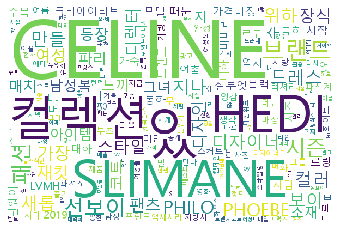

In [86]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('hannanum_adj_noun_celine.png')

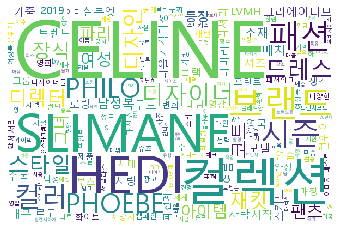

In [87]:
wc.generate_from_frequencies(dict(noun_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()

wc.to_file('hannanum_noun_celine.png')